In [73]:
import pandas as pd
import numpy as np
from collections import Counter
from ast import literal_eval
from matplotlib import pyplot as plt

In [74]:
df = pd.read_csv('/Users/matthijsvossen/Documents/Data/data.csv', converters={"url_id_path": literal_eval})
url_references = pd.read_csv('/Users/matthijsvossen/Documents/Data/url_references_reduced.csv')

In [75]:
df.head(1000)

,visitor_id[visit_number],url_id_path,seconds_spent_path,start_number,visited_mijnomgeving,event_src_site_id
0,0[1],"[188, 1557, 3, 1, 13, 14, 21, 16, 14, 18, 14, ...","[4, 17, 5, 7, 31, 27, 126, 55, 9, 13, 3, 328, 5]",1644099614035,1,0
1,1[1],"[1557, 3, 1, 13, 1556]","[14, 4, 4, 33, 0]",1642603154936,1,1
2,2[1],[978],[0],1649784712759,0,0
3,3[1],"[188, 194, 784]","[5, 20, 0]",1664380711086,0,0
4,4[1],"[23, 1557, 3, 13]","[0, 163, 4, 151]",1642669318114,1,1
...,...,...,...,...,...,...
995,586[16],"[901, 223]","[8, 0]",1650468720814,0,0
996,586[17],[237],[3],1651827633029,0,0
997,586[18],"[188, 901, 966, 889]","[32, 27, 57, 26]",1654526728475,0,0
998,586[19],"[889, 278]","[50, 0]",1654686502709,0,0


In [76]:
url_references.head(10)

,id,urls
0,1,https://mijn.abp.nl/
1,2,https://mijn.abp.nl/welkom/
2,3,https://mijn.abp.nl/welkom
3,4,https://mijn.abp.nl/plan-uw-pensioen/zelf-same...
4,5,https://mijn.abp.nl/plan-uw-pensioen/zelf-same...
5,6,https://mijn.abp.nl/pensioenoverzicht/
6,7,https://mijn.abp.nl/pensioenoverzicht
7,8,https://mijn.abp.nl/Account/login
8,9,https://mijn.abp.nl/account/login
9,10,https://mijn.abp.nl/account/login/


In [132]:
def get_final_page(list):
    if len(list) > 1 and list[-1] == 1556:
        return list[-1]
    return list[-1]

def get_urls(pages):
    urls = []
    for page in pages:
        url = url_references.loc[url_references['id'] == page]['urls'].tolist()
        urls.append(url)
    return urls

In [101]:
page_dropouts = [get_final_page(x) for x in df["url_id_path"]]
page_dropouts = Counter(page_dropouts).most_common()
page_dropouts = pd.DataFrame(page_dropouts, columns = ['page', 'count'])

In [102]:
page_dropouts.head(10)

,page,count
0,1556,1319522
1,1557,1190202
2,13,633238
3,237,207421
4,1,163559
5,188,128980
6,7,109383
7,17,90567
8,12,75928
9,966,73303


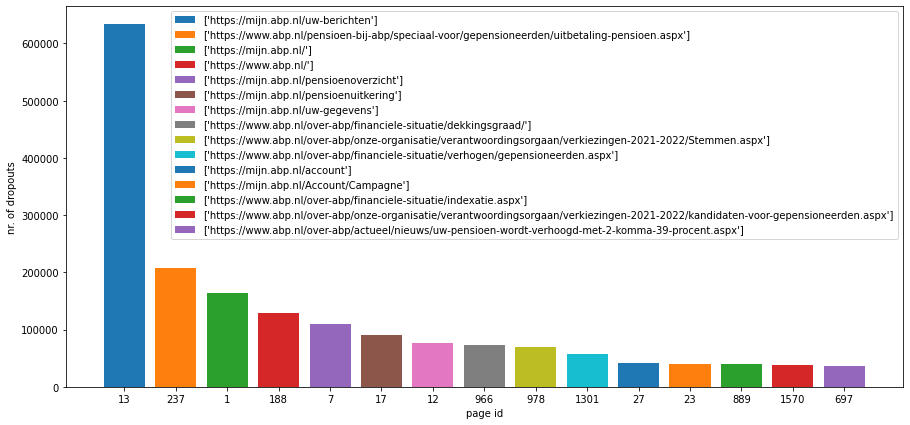

In [184]:
n = 15 # nr. of bins

fig = plt.subplots(figsize = (15,7))
pages, counts = page_dropouts['page'][2:n+2].tolist(), page_dropouts['count'][2:n+2].tolist()
labels = get_urls(pages)
xs = np.arange(len(pages))
plt.xticks(xs, pages)

for i, x in enumerate(xs):
    plt.bar(i, counts[x])

plt.xlabel('page id')
plt.ylabel('nr. of dropouts')
plt.legend(labels)

plt.savefig('dropouts.pdf')